In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Import libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import svm
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix


# **Load the data**

In [ ]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(heart.columns)
X =  heart.drop('DEATH_EVENT', axis=1)
y = heart.DEATH_EVENT

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [ ]:
for i, col1 in enumerate(heart.columns):
    for j, col2 in enumerate(heart.columns):
        if i < j:
            sns.scatterplot(x=col1, y=col2, hue='DEATH_EVENT', data=heart)
            plt.show()

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# **Split the data**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [ ]:
# selecting best features
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k=5)
X_kbest = k_best.fit_transform(X, y)

feature_names = X.columns[k_best.get_support(indices=True)].tolist()
print("The {} best features are: {}".format(k_best.k, feature_names))

The 5 best features are: ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']


# **Logistic regression**

In [ ]:
lm = LogisticRegression(max_iter=1000)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))
display('accuracy = {}'.format(acc))

'precision = [0.75555556 0.93333333]'

'recall = [0.97142857 0.56      ]'

'f-score = [0.85 0.7 ]'

'accuracy = 0.8'

<AxesSubplot:>

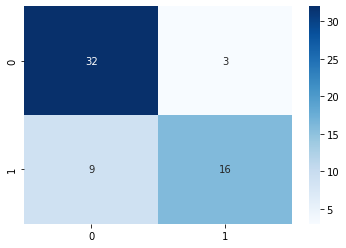

In [ ]:

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap 
sns.heatmap(cm, annot=True, cmap="Blues")

# **Linear SVM**

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Evaluate the linear SVM model on the testing set
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
p_svm,r_svm,f_svm,s_svm = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p_svm))
display('recall = {}'.format(r_svm))
display('f-score = {}'.format(f_svm))
display('accuracy = {}'.format(acc_svm))

'precision = [0.75555556 0.93333333]'

'recall = [0.97142857 0.56      ]'

'f-score = [0.85 0.7 ]'

'accuracy = 0.8166666666666667'

<AxesSubplot:>

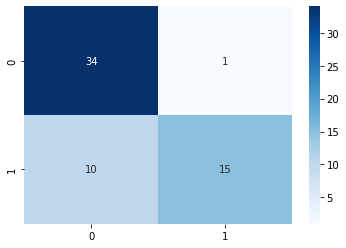

In [ ]:

cm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix as a heatmap 
sns.heatmap(cm, annot=True, cmap="Blues")



# **Polynomial SVM**

In [ ]:
poly_svm_model = SVC(kernel='poly', degree=2)
poly_svm_model.fit(X_train, y_train)

# Evaluate the polynomial SVM model on the testing set
y_pred_poly_svm = poly_svm_model.predict(X_test)
acc_poly_svm = accuracy_score(y_test, y_pred_poly_svm)
p_p_svm,r_p_svm,f_p_svm,s_p_svm = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p_p_svm))
display('recall = {}'.format(r_p_svm))
display('f-score = {}'.format(f_p_svm))
display('accuracy = {}'.format(acc_poly_svm))

'precision = [0.75555556 0.93333333]'

'recall = [0.97142857 0.56      ]'

'f-score = [0.85 0.7 ]'

'accuracy = 0.5833333333333334'

<AxesSubplot:>

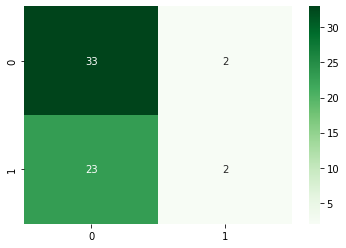

In [ ]:

cm = confusion_matrix(y_test, y_pred_poly_svm)

# Plot the confusion matrix as a heatmap 
sns.heatmap(cm, annot=True, cmap="Greens")

# **RBF SVM**

In [ ]:
rbf_svm_model = SVC(kernel='rbf')
rbf_svm_model.fit(X_train, y_train)

# Evaluate the RBF SVM model on the testing set
y_pred_rbf_svm = rbf_svm_model.predict(X_test)
acc_rbf_svm = accuracy_score(y_test, y_pred_rbf_svm)
p_rbf_svm,r_rbf_svm,f_rbf_svm,s_rbf_svm = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p_rbf_svm))
display('recall = {}'.format(r_rbf_svm))
display('f-score = {}'.format(f_rbf_svm))
display('accuracy = {}'.format(acc_rbf_svm))

'precision = [0.75555556 0.93333333]'

'recall = [0.97142857 0.56      ]'

'f-score = [0.85 0.7 ]'

'accuracy = 0.75'

<AxesSubplot:>

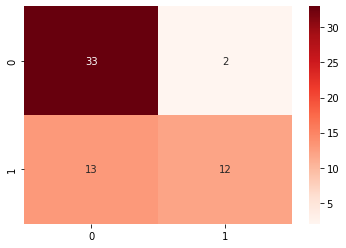

In [ ]:

cm = confusion_matrix(y_test, y_pred_rbf_svm)


sns.heatmap(cm, annot=True, cmap="Reds")

In [ ]:
# Train logistic regression model with OVR strategy
lm_ovr = LogisticRegression(max_iter=1000, multi_class='ovr')
lm_ovr.fit(X_train, y_train)

# Train logistic regression model with OVO strategy
lm_ovo = LogisticRegression(max_iter=1000, multi_class='multinomial')
lm_ovo.fit(X_train, y_train)

In [ ]:
# Train linear SVM model with OVR strategy
svm_ovr = LinearSVC(max_iter=10000, multi_class='ovr')
svm_ovr.fit(X_train, y_train)

# Train linear SVM model with OVO strategy
svm_ovo = LinearSVC(max_iter=10000, multi_class='crammer_singer')
svm_ovo.fit(X_train, y_train)


In [ ]:
# Train RBF SVM model with OVR strategy
rbf_svm_ovr = SVC(kernel='rbf', decision_function_shape='ovr')
rbf_svm_ovr.fit(X_train, y_train)

# Train RBF SVM model with OVO strategy
rbf_svm_ovo = SVC(kernel='rbf', decision_function_shape='ovo')
rbf_svm_ovo.fit(X_train, y_train)

In [ ]:
# Evaluate model performance on test set using OVR strategy
y_pred_lm_ovr = lm_ovr.predict(X_test)
y_pred_svm_ovr = svm_ovr.predict(X_test)
y_pred_rbf_svm_ovr = rbf_svm_ovr.predict(X_test)

p_lm_ovr, r_lm_ovr, f_lm_ovr, _ = precision_recall_fscore_support(y_test, y_pred_lm_ovr)
p_svm_ovr, r_svm_ovr, f_svm_ovr, _ = precision_recall_fscore_support(y_test, y_pred_svm_ovr)
p_rbf_svm_ovr, r_rbf_svm_ovr, f_rbf_svm_ovr, _ = precision_recall_fscore_support(y_test, y_pred_rbf_svm_ovr)

print('Logistic Regression (OVR):')
print('Precision:', p_lm_ovr)
print('Recall:', r_lm_ovr)
print('F-score:', f_lm_ovr)

print('Linear SVM (OVR):')
print('Precision:', p_svm_ovr)
print('Recall:', r_svm_ovr)
print('F-score:', f_svm_ovr)

print('RBF SVM (OVR):')
print('Precision:', p_rbf_svm_ovr)
print('Recall:', r_rbf_svm_ovr)
print('F-score:', f_rbf_svm_ovr)

Logistic Regression (OVR):
Precision: [0.75555556 0.93333333]
Recall: [0.97142857 0.56      ]
F-score: [0.85 0.7 ]
Linear SVM (OVR):
Precision: [0.77272727 0.9375    ]
Recall: [0.97142857 0.6       ]
F-score: [0.86075949 0.73170732]
RBF SVM (OVR):
Precision: [0.7173913  0.85714286]
Recall: [0.94285714 0.48      ]
F-score: [0.81481481 0.61538462]


# **SVM model with class weights**

In [ ]:
# Define the parameter grid for class weights
param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 15)]}

# Create an SVM model
svm = LinearSVC(max_iter=10000)

# Create a grid search object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and print the results
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

acc_weighted = accuracy_score(y_test, y_pred)
p_weighted, r_weighted, f_weighted, s_weighted = precision_recall_fscore_support(y_test, y_pred, zero_division=1)

display('precision = {}'.format(p_weighted))
display('recall = {}'.format(r_weighted))
display('f-score = {}'.format(f_weighted))
display('accuracy = {}'.format(acc_weighted))


'precision = [0.7804878  0.84210526]'

'recall = [0.91428571 0.64      ]'

'f-score = [0.84210526 0.72727273]'

'accuracy = 0.8'

In [ ]:

# Define the parameter grid for class weights
param_grid = {'class_weight': ['balanced']}

# Create an SVM model
svm = LinearSVC(max_iter=10000)

# Create a grid search object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and print the results
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

acc_weighted = accuracy_score(y_test, y_pred)
p_weighted, r_weighted, f_weighted, s_weighted = precision_recall_fscore_support(y_test, y_pred, zero_division=1)

display('precision = {}'.format(p_weighted))
display('recall = {}'.format(r_weighted))
display('f-score = {}'.format(f_weighted))
display('accuracy = {}'.format(acc_weighted))


'precision = [0.7804878  0.84210526]'

'recall = [0.91428571 0.64      ]'

'f-score = [0.84210526 0.72727273]'

'accuracy = 0.8'

# **Logistic regression with cross validation**

In [ ]:
# Evaluate generalizability with cross-validation
lm_scores = cross_val_score(lm, X_train, y_train, cv=10, scoring='accuracy')

print('Logistic Regression:')
print('Mean accuracy:', np.mean(lm_scores))
print('Standard deviation:', np.std(lm_scores))



Logistic Regression:
Mean accuracy: 0.836413043478261
Standard deviation: 0.10211045541995274


In [ ]:
# Evaluate generalizability with cross-validation
lm_scores = cross_val_score(lm, X_train, y_train, cv=5, scoring='f1')

print('Logistic Regression:')
print('Mean F-score:', np.mean(lm_scores))
print('Standard deviation:', np.std(lm_scores))



Logistic Regression:
Mean F-score: 0.6733546813007083
Standard deviation: 0.15531856118071094


# **Learning curve for logistic regression**

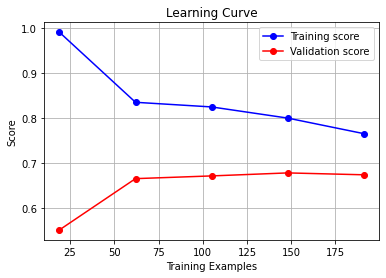

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(lm, X_train, y_train, cv=5, scoring='f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')

plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='r', label='Validation score')
plt.legend(loc='best')
plt.grid()
plt.show()


# **SVM with cross validation**

In [ ]:
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print('Linear SVM:')
print('Mean accuracy:', np.mean(svm_scores))
print('Standard deviation:', np.std(svm_scores))


Linear SVM:
Mean accuracy: 0.8322695035460994
Standard deviation: 0.06186812776492568


In [ ]:
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='f1')
print('Linear SVM:')
print('Mean F-score:', np.mean(svm_scores))
print('Standard deviation:', np.std(svm_scores))


Linear SVM:
Mean F-score: 0.6844536461927767
Standard deviation: 0.1421955502194925


# **Learning curve for SVM**

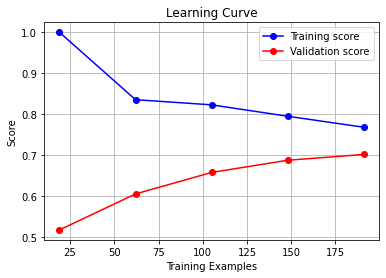

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(svm_model, X_train, y_train, cv=5, scoring='f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')

plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='r', label='Validation score')
plt.legend(loc='best')
plt.grid()
plt.show()


# **rbf svm with cross validation**

In [ ]:
rbf_svm_scores = cross_val_score(rbf_svm_model, X_train, y_train, cv=5, scoring='accuracy')

print('RBF SVM:')
print('Mean accuracy:', np.mean(rbf_svm_scores))
print('Standard deviation:', np.std(rbf_svm_scores))


RBF SVM:
Mean accuracy: 0.8074468085106383
Standard deviation: 0.0485703965534262


In [ ]:
rbf_svm_scores = cross_val_score(rbf_svm_model, X_train, y_train, cv=5, scoring='f1')

print('RBF SVM:')
print('Mean F-score:', np.mean(rbf_svm_scores))
print('Standard deviation:', np.std(rbf_svm_scores))


RBF SVM:
Mean F-score: 0.6485130450647693
Standard deviation: 0.09358179201463956


# **Desicion Boundary**

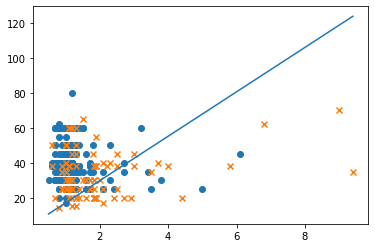

In [ ]:
X1 = heart[['serum_creatinine', 'ejection_fraction']]

lm = LogisticRegression()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

lm.fit(X1_train, y1_train)

Xy = list(zip(X1.values.tolist(), y.tolist()))
zeros = [xy for xy in Xy if xy[1] == 0]
(Xzeros, yzeros) = list(zip(*zeros))
ones = [xy for xy in Xy if xy[1] == 1]
(Xones, yones) = list(zip(*ones))

Xzeros = np.array(Xzeros)
Xones = np.array(Xones)

plt.scatter(Xzeros[:,0], Xzeros[:,1], marker='o')
plt.scatter(Xones[:,0], Xones[:,1], marker='x')

b0 = lm.intercept_[0]
b1, b2 = lm.coef_[0]

b0 = lm.intercept_[0]
b = lm.coef_[0]
Xdb = [min(heart['serum_creatinine']), max(heart['serum_creatinine'])]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)

plt.show()

Text(0, 0.5, 'ejection_fraction')

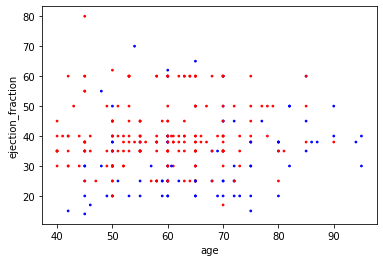

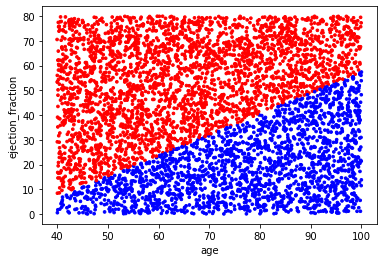

In [ ]:

lm.fit(heart[['age', 'ejection_fraction']], heart['DEATH_EVENT'])

# Plot the dataset colored by prediction
color = ['r' if y_ == 0 else 'b' for y_ in heart['DEATH_EVENT']]
plt.scatter(heart['age'], heart['ejection_fraction'], c=color, s=3)
plt.xlabel('age')
plt.ylabel('ejection_fraction')

b0 = lm.intercept_
b = lm.coef_[0]

# Plot random points colored by prediction
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
    px = random.uniform(40,100)
    py = random.uniform(0,80)
    plabel = lm.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.figure()
plt.scatter(newx, newy, c=color, marker='o', s=7)
plt.xlabel('age')
plt.ylabel('ejection_fraction')

## Read in data

In [ ]:
df=pd.read_csv('nba_data_processed.csv')

## Add all star column and clean data

In [ ]:
allStars=['LeBron James', 'Giannis Antetokounmpo', 'Jayson Tatum', 'Donovan Mitchell', 'Kyrie Irving','Luka Dončić','Nikola Jokić', 'Joel Embiid','Ja Morant', 'Lauri Markkanen','Bam Adebayo','Jaylen Brown', 'DeMar DeRozan', 'Tyrese Haliburton', 'Jrue Holiday', 'Julius Randle', 'Pascal Siakam','Anthony Edwards','De\'Aaron Fox', 'Paul George','Shai Gilgeous-Alexander', 'Jaren Jackson Jr.', 'Damian Lillard', 'Domantas Sabonis', 'Stephen Curry','Kevin Durant', 'Zion Williamson']
df['AllStar']=df.apply(lambda x:1 if x['Player'] in allStars else 0, axis=1)
allStarP=df[df.AllStar==1]
temp=pd.get_dummies(df.Pos)
df.rename(columns = {'PF':'F'}, inplace = True)
nba=df.join(temp)
nba.dropna(inplace=True)

## Create Logistic Model

In [ ]:
nbax = nba[[ 'MP',   'FT',   'TRB', 'AST', 'STL', 'BLK', 'TOV',  'PTS']]
x =nbax.values.tolist()
nbay = nba['AllStar']
y = nbay.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.98701299 0.58333333]'

'recall = [0.96815287 0.77777778]'

'f-score = [0.97749196 0.66666667]'

In [ ]:
nba['AllStarPred']=model.predict(x)
display(nba.AllStarPred)
nbafp=nba[(nba.AllStarPred==1) & (nba.AllStar==0)]
display(nbafp)
nbafn=nba[(nba.AllStarPred==0) & (nba.AllStar==1)]
display(nbafn)

# Evaluate generalizability with cross-validation

Logistic Regression:
Mean F-score: 0.7966666666666666
Standard deviation: 0.31427164470671964


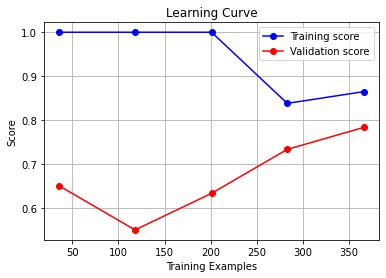

In [ ]:
model_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')

print('Logistic Regression:')
print('Mean F-score:', np.mean(model_scores))
print('Standard deviation:', np.std(model_scores))

train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=20, scoring='f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')

plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='r', label='Validation score')
plt.legend(loc='best')
plt.grid()
plt.show()

## Create Support Mector Machine model for comparison

In [ ]:
svmModel = LinearSVC()
svmModel.fit(X_train, y_train)

 
y_predSVM = svmModel.predict(X_test)
accSVM = accuracy_score(y_test, y_predSVM)
pSVM,rSVM,fSVM,sSVM = precision_recall_fscore_support(y_test, y_predSVM)
display('precision = {}'.format(pSVM))
display('recall = {}'.format(rSVM))
display('f-score = {}'.format(fSVM))
display('accuracy = {}'.format(accSVM))

'precision = [0.97452229 0.55555556]'

'recall = [0.97452229 0.55555556]'

'f-score = [0.97452229 0.55555556]'

'accuracy = 0.9518072289156626'

## Explore data relationships

Text(0, 0.5, 'Points')

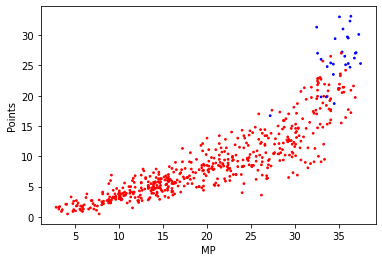

In [ ]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(nba.MP, nba.PTS, c=color, s=3)
plt.xlabel('MP')
plt.ylabel('Points')

Text(0, 0.5, 'Points')

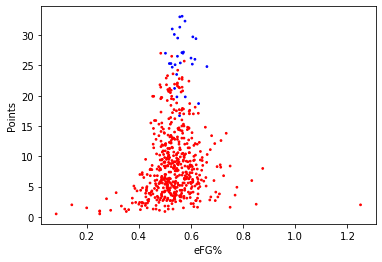

In [ ]:
plt.scatter(nba['eFG%'], nba.PTS, c=color, s=3)
plt.xlabel('eFG%')
plt.ylabel('Points')

Text(0, 0.5, 'Assists')

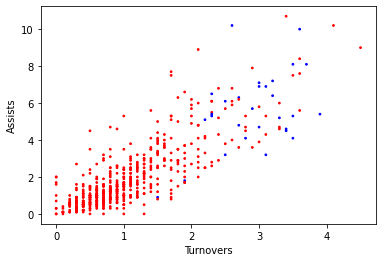

In [ ]:
plt.scatter(nba.TOV, nba.AST, c=color, s=3)
plt.xlabel('Turnovers')
plt.ylabel('Assists')

Text(0, 0.5, 'Rebounds')

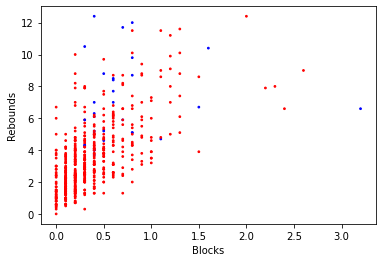

In [ ]:
plt.scatter(nba.BLK, nba.TRB, c=color, s=3)
plt.xlabel('Blocks')
plt.ylabel('Rebounds')

Text(0, 0.5, 'Steals')

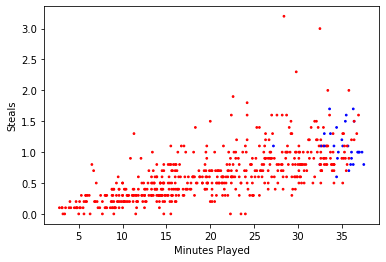

In [ ]:
plt.scatter(nba.MP, nba.STL, c=color, s=3)
plt.xlabel("Minutes Played")
plt.ylabel('Steals')

Text(0, 0.5, 'Steals')

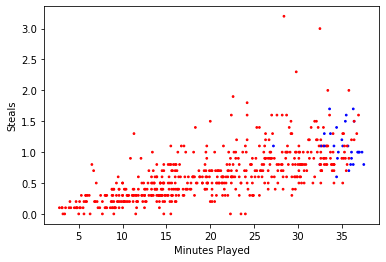

In [ ]:
plt.scatter(nba.MP, nba.STL, c=color, s=3)
plt.xlabel("Minutes Played")
plt.ylabel('Steals')

Text(0, 0.5, 'All Star')

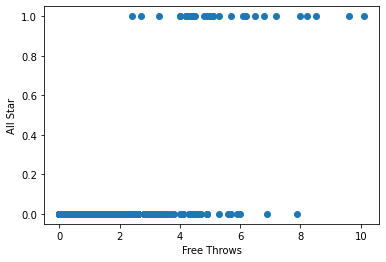

In [ ]:
plt.scatter(nba.FT,nba.AllStar)
plt.xlabel('Free Throws')
plt.ylabel('All Star')

## View boundary line for Minutes Played and Points

Text(0, 0.5, 'Points')

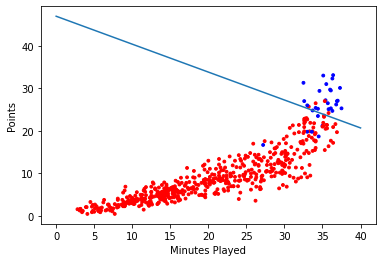

In [ ]:
nbax = nba[[ 'MP',    'PTS']]
x =nbax.values.tolist()
nbay = nba['AllStar']
y = nbay.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)


b0 = lm.intercept_[0]
b = lm.coef_[0]
Xdb=[0,40]
ydb=[-(b0+b[0]*x)/b[1] for x in Xdb]
plt.scatter(nba.MP, nba.PTS, c=color, s=8)

plt.plot(Xdb, ydb)
plt.xlabel('Minutes Played')
plt.ylabel('Points')